### Import Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Load the Dataset

In [4]:
df = pd.read_csv('data/linear.csv')
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


### Remove Missing Values

In [5]:
df.shape

(102, 2)

In [6]:
df.isnull().sum()

x    0
y    8
dtype: int64

In [7]:
df = df.dropna(how = 'any')

In [8]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [9]:
df.shape

(94, 2)

### Arrange Data into Features Matrix and Target Vector

In [10]:
X = df.loc[:, ['x']].values

In [11]:
X.shape

(94, 1)

In [12]:
y = df.loc[:, 'y'].values

In [13]:
y.shape

(94,)

### Linear Regression

In [16]:
# make instance of the model
reg = LinearRegression(fit_intercept=True)

In [18]:
# training the data
reg.fit(X,y)

LinearRegression()

In [20]:
# predict the value of the data
reg.predict(X[0].reshape(-1, 1))

array([-50.99119328])

In [21]:
# predicting from multiple data
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

### Measure Model Performance

In [22]:
score = reg.score(X, y)
print(score)

0.979881836115762


### Equation of the line for the regression

In [24]:
reg.coef_

array([1.58368564])

In [26]:
reg.intercept_

-50.99119328333394

In [27]:
m = reg.coef_[0]
b = reg.intercept_

print(f'formila: y = {m:.2f}x + {b:.2f}')

formila: y = 1.58x + -50.99


### Plotting the Best Fit linear Regression Line

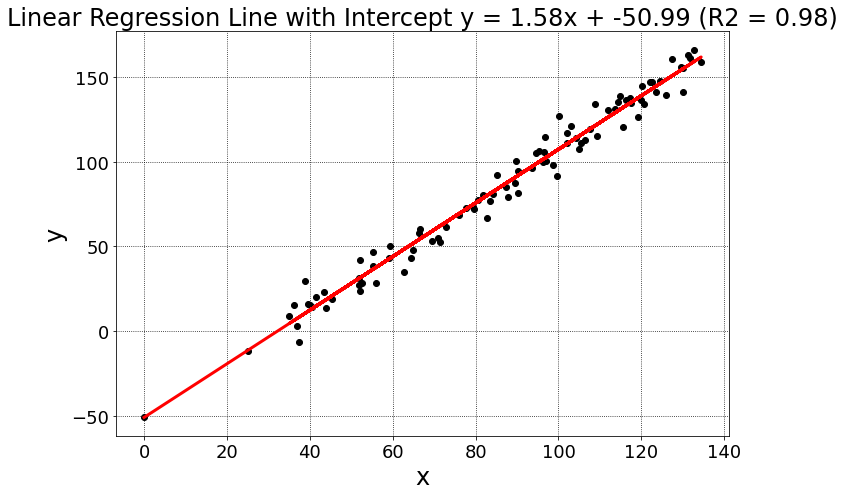

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

ax.scatter(X, y, color='black')
ax.plot(X, reg.predict(X), color='red', linewidth=3)
ax.grid(True, axis='both', zorder=0, linestyle=':', color='k')
ax.tick_params(labelsize=18)
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_title(f'Linear Regression Line with Intercept y = {m:.2f}x + {b:.2f} (R2 = {score:.2f})', fontsize=24)
fig.tight_layout()


### Plotting Models with or withput Intercept

In [31]:
# Model with Intercept
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X, y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

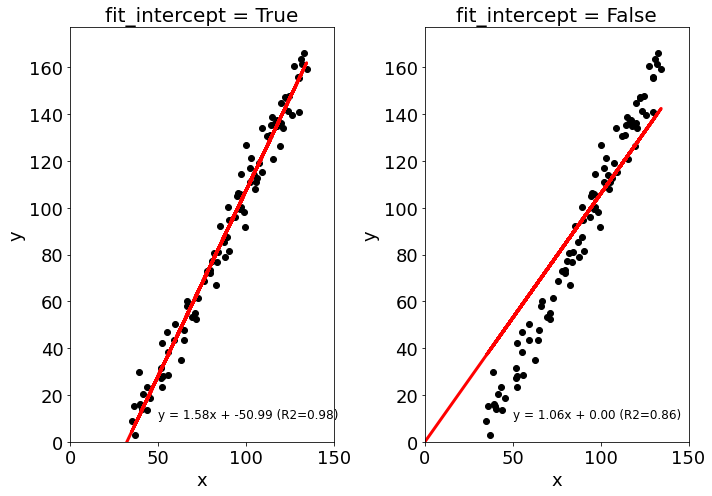

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]):
    model.fit(X, y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_

    ax[index].scatter(X, y, color='black')
    ax[index].plot(X, model.predict(X), color='red', linewidth=3)

    ax[index].tick_params(labelsize=18)
    ax[index].set_xlabel('x', fontsize=18)
    ax[index].set_ylabel('y', fontsize=18)
    ax[index].set_xlim(left=0, right=150)
    ax[index].set_ylim(bottom=0)

    ax[index].text(50, 10, f'y = {m:.2f}x + {b:.2f} (R2={score:.2f})', fontsize=12)

ax[0].set_title('fit_intercept = True', fontsize=20)
ax[1].set_title('fit_intercept = False', fontsize=20)
fig.tight_layout()